In [ ]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import display 

In [2]:
TRAIN_DF = "/home/nacho/TFI-Cazcarra/data/csv/test_diagramas_linux.csv"
train_df = pd.read_csv(TRAIN_DF)

In [3]:
# train_df[train_df['tabla']=="tabla"].to_csv("temp_tablas.csv", index=False)

In [4]:
# not_tablas = train_df[train_df['tabla']!="tabla"]
# new_header = not_tablas.iloc[0] #grab the first row for the header
# not_tablas = not_tablas[1:] #take the data less the header row
# not_tablas.columns = new_header #set the header row as the df header

# not_tablas.to_csv("temp_not_tablas.csv", index=False)

In [6]:
print(train_df.shape)
train_df.head()

(104, 6)


,image_path,xmin,ymin,xmax,ymax,label
0,/home/nacho/TFI-Cazcarra/data/imagenes_diagram...,276,148,430,619,tabla
1,/home/nacho/TFI-Cazcarra/data/imagenes_diagram...,541,501,692,819,tabla
2,/home/nacho/TFI-Cazcarra/data/imagenes_diagram...,745,149,897,463,tabla
3,/home/nacho/TFI-Cazcarra/data/imagenes_diagram...,524,650,543,666,muchos_obligatorio
4,/home/nacho/TFI-Cazcarra/data/imagenes_diagram...,724,295,744,314,muchos_obligatorio


In [7]:
def draw_bbox(img, row):
    if(row['dif_x']<CONSTANT or row['dif_y']<CONSTANT):
        return cv2.rectangle(img, (row['xmin'], row['ymin']), (row['xmax'], row['ymax']), (255,0,0), 2)
    else:
        return cv2.rectangle(img, (row['xmin'], row['ymin']), (row['xmax'], row['ymax']), (0,255,0), 2)
    

def display_all_images(df):
    for image_path in df['image_path'].unique():
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        df_image = df[df['image_path']==image_path]
        
        for _, row in df_image.iterrows():
            img = draw_bbox(img, row)
        display(Image.fromarray(img))

In [8]:
CONSTANT = 26

In [15]:
filtered = train_df.copy()

filtered['dif_x'] = abs(filtered['xmin'] - filtered['xmax'])
filtered['dif_y'] = abs(filtered['ymin'] - filtered['ymax'])

filtered['exc_x'] = CONSTANT - filtered['dif_x']
filtered['exc_y'] = CONSTANT - filtered['dif_y']

In [16]:
filtered['xmin'] -= filtered['exc_x'].apply(lambda exc: (exc+1)//2 if exc>0 else 0)
filtered['xmax'] += filtered['exc_x'].apply(lambda exc: (exc+1)//2 if exc>0 else 0)

filtered['ymin'] -= filtered['exc_y'].apply(lambda exc: (exc+1)//2 if exc>0 else 0)
filtered['ymax'] += filtered['exc_y'].apply(lambda exc: (exc+1)//2 if exc>0 else 0)

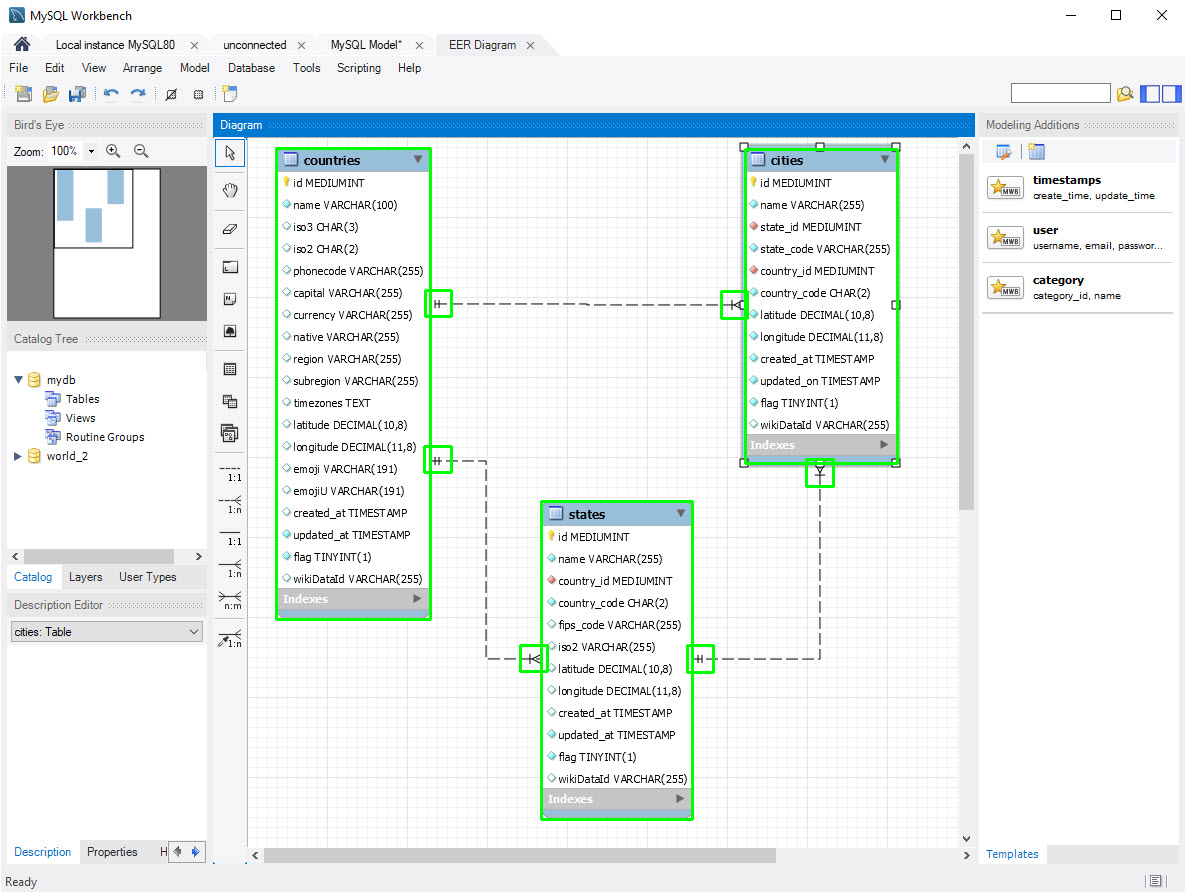

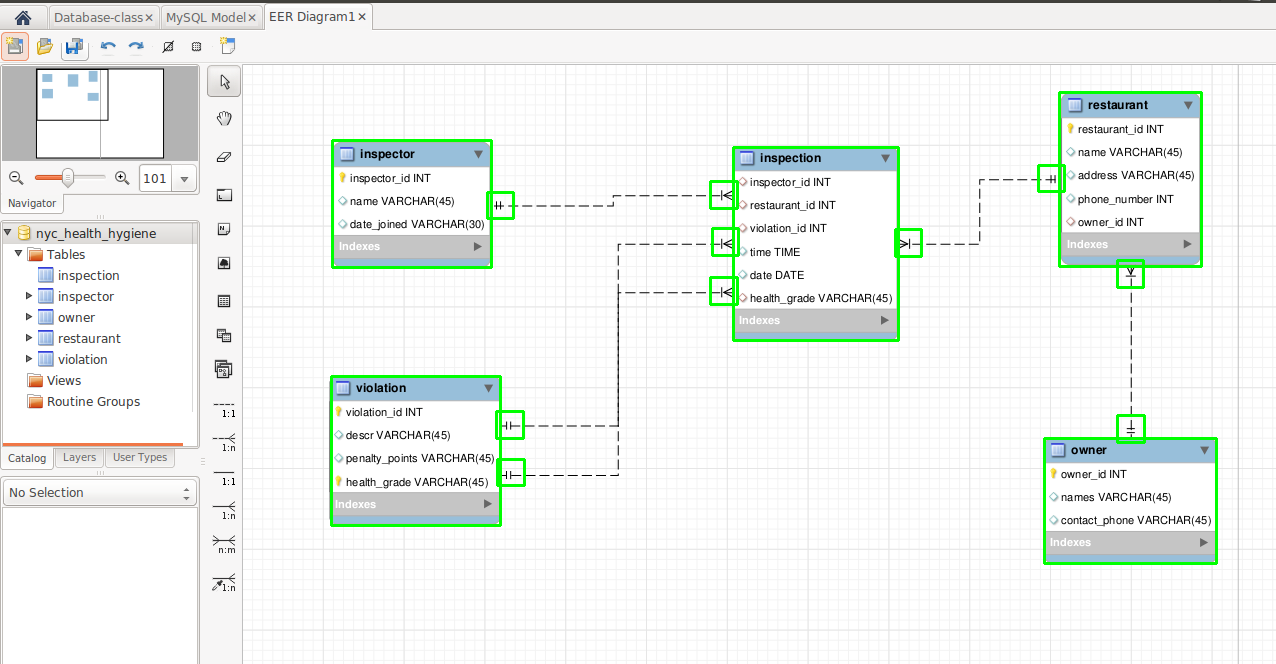

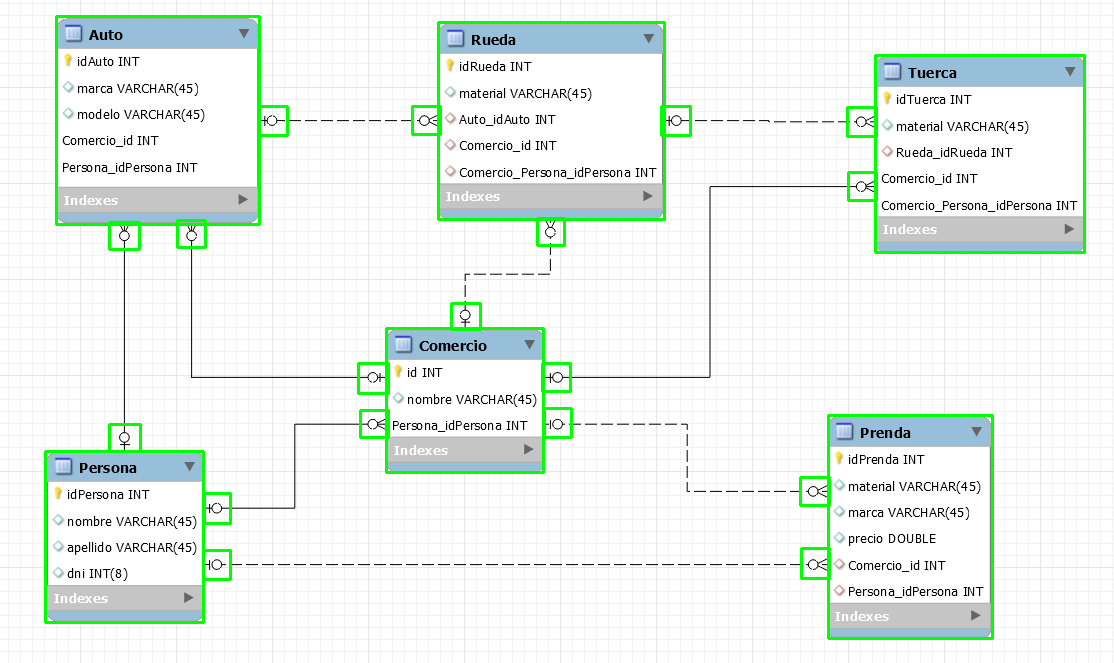

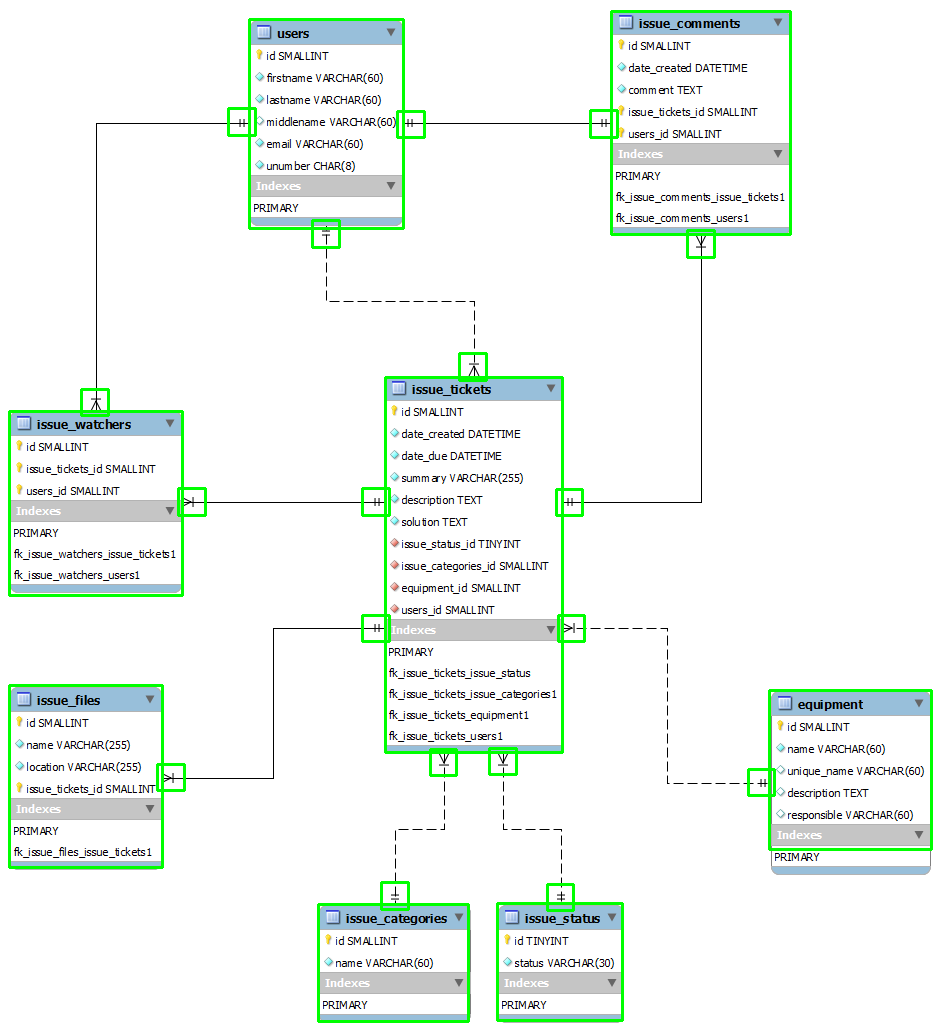

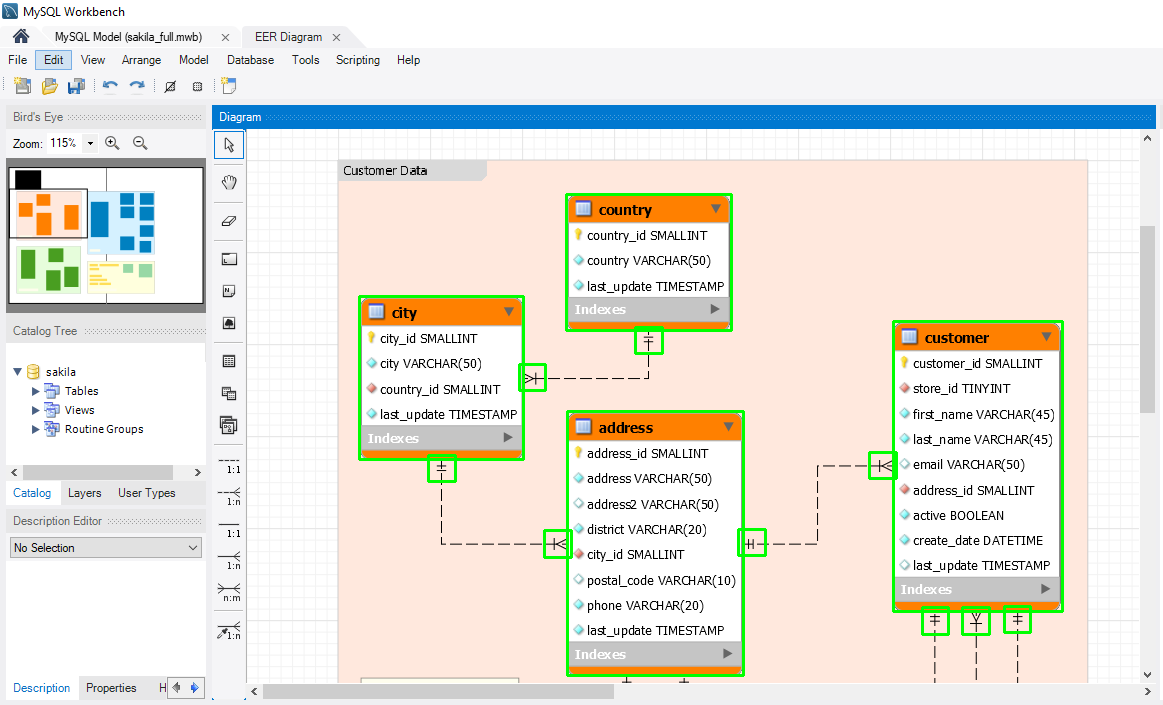

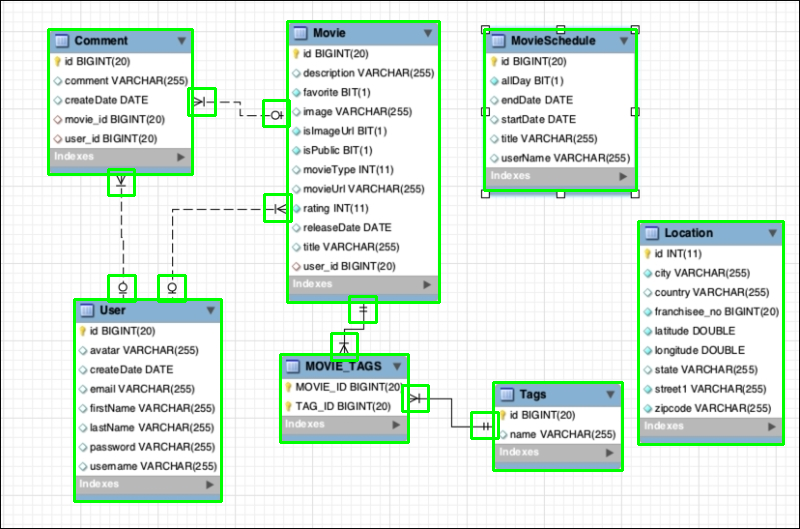

In [17]:
filtered['dif_x'] = abs(filtered['xmin'] - filtered['xmax'])
filtered['dif_y'] = abs(filtered['ymin'] - filtered['ymax'])

display_all_images(filtered)

In [18]:
filtered.drop(columns=["exc_x","exc_y","dif_x","dif_y"], inplace=True)
filtered.to_csv("/home/nacho/TFI-Cazcarra/notebooks/augmented_test_diagramas.csv", index=False)